In [20]:
import csv
import os
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
def leer_presiones_flujos(ruta_archivo):
    presiones = []
    flujos=[]
    times=[]
    with open(ruta_archivo, 'r') as archivo:
        lector_csv = csv.DictReader(archivo)
        for fila in lector_csv:
            tiempo = float(fila['Time [s]'])
            if tiempo <= 30:  # Considerar solo los primeros 30 segundos
                presion = float(fila['Pressure [cmH2O]'])
                presiones.append(presion)
                flujo = float(fila['Flow [L/s]'])
                flujos.append(flujo)
                time = float(fila['Time [s]'])
                times.append(time)
            else:
                break  # Salir del bucle si el tiempo excede los 30 segundos
    return presiones,flujos,times

# Función para leer el archivo CSV y extraer los valores de la columna 'Pressure [cmH2O]' para los primeros 25 segundos

In [22]:
def obtener_PEEP_COPD(nombre_archivo):
    # Buscar los valores de A y B en el nombre del archivo
    valor_A = None
    valor_B = None
    
    # Buscar el valor de A
    patron_A = r'_(\d+)cmH'
    coincidencia_A = re.search(patron_A, nombre_archivo)
    if coincidencia_A:
        valor_A = int(coincidencia_A.group(1))
    
    # Buscar el valor de B
    patron_B = r'_(\d+)mL'
    coincidencia_B = re.search(patron_B, nombre_archivo)
    if coincidencia_B:
        valor_B = int(coincidencia_B.group(1))
    
    return valor_A, valor_B

# Función para obtener valor de PEEP y de EPOC a partir del nombre del archivo

In [23]:
def plotear_flujo_presiones_copd(n,peep):
    x=lista_times[(n-1)*12+peep]
    flujo_0mL=lista_flujos[(n-1)*12+peep] 
    flujo_200mL=lista_flujos[(n-1)*12+peep+1]
    flujo_250mL=lista_flujos[(n-1)*12+peep+2]
    flujo_300mL=lista_flujos[(n-1)*12+peep+3]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, flujo_0mL, label='COPD: 0mL')
    plt.plot(x, flujo_200mL, label='COPD: 200mL')
    plt.plot(x, flujo_250mL, label='COPD: 250mL')
    plt.plot(x, flujo_300mL, label='COPD: 300mL')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Flujo [L/s]')
    plt.title('Flujos para PEEP '+str(peep)+'cmH2O paciente '+str(n))
    plt.xlim(0,10)
    plt.legend()

    x=lista_times[(n-1)*12+peep]
    presion_0mL=lista_presiones[(n-1)*12+peep]
    presion_200mL=lista_presiones[(n-1)*12+peep+1]
    presion_250mL=lista_presiones[(n-1)*12+peep+2]
    presion_300mL=lista_presiones[(n-1)*12+peep+3]

    plt.subplot(1, 2, 2)
    plt.plot(x, presion_0mL, label='COPD: 0mL')
    plt.plot(x, presion_200mL, label='COPD: 200mL')
    plt.plot(x, presion_250mL, label='COPD: 250mL')
    plt.plot(x, presion_300mL, label='COPD: 300mL')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Presión [cmH20]')
    plt.title('Presiones para PEEP '+str(peep)+'cmH2O paciente '+str(n))
    plt.xlim(0,20)
    plt.legend()
    plt.show()

    

In [24]:
def plot_flujoypresion(n,peep,copd):
    num=0
    if copd==0:
        num=0
    elif copd==200:
        num=1
    elif copd==250:
        num=2
    elif copd==300:
        num=3

    x=lista_times[(n-1)*12+peep+num]
    flujo=lista_flujos[(n-1)*12+peep+num]
    presion=lista_presiones[(n-1)*12+peep+num]
    plt.plot(x,flujo, label='Flujo')
    plt.plot(x,presion, label='Presion')
    plt.xlabel('Tiempo')
    plt.title("Flujo y presión para paciente "+str(n)+" PEEP:"+str(peep)+"cmH2O y COPD:"+str(copd)+"mL")
    plt.legend()
    plt.show()


In [25]:
def plot_flujo_presion(n):
    tiempo=lista_times[n]
    flujo=lista_flujos[n]
    presion=lista_presiones[n]
    peep=PEEP[n]
    copd=COPD[n]

    plt.figure(figsize=(12, 6))  # Tamaño de la figura
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
    plt.plot(tiempo, flujo, 'b-')  # Graficar tiempo vs flujo
    plt.title('Flujo en función del tiempo con PEEP:'+str(peep)+' y COPD:'+str(copd))
    plt.xlabel('Tiempo')
    plt.ylabel('Flujo')

    # Gráfico para la presión
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
    plt.plot(tiempo, presion, 'r-')  # Graficar tiempo vs presión
    plt.title('Presión en función del tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Presión')

    plt.tight_layout()  # Ajustar diseño para que no haya superposición
    plt.show()

LECTURA DE ARCHIVOS

In [26]:
df = pd.read_csv('D:\DESK\PATRONUS\simulated-obstructive-disease-respiratory-pressure-and-flow-1.0.0\COPD_Demographic.csv')

# Muestra la información del DataFrame
print(df)
print(df.info())

    Subject Number  Age  Gender Height [cm] History of Smoking (yes/no)   
0                1   24  Female     160-169                          No  \
1                2   21    Male     170-179                          No   
2                3   23    Male     180-189                          No   
3                4   22  Female     170-179                          No   
4                5   30    Male     170-179                         Yes   
5                6   29    Male     180-189                          No   
6                7   24  Female     170-179                          No   
7                8   21  Female     160-169                          No   
8                9   23  Female     170-179                         No    
9               10   27    Male     180-189                          No   
10              11   21  Female     170-179                          No   
11              12   22  Female     180-189                          No   
12              13   28  

In [27]:
# Ruta del directorio donde se encuentran los archivos CSV
directorio = r"D:\DESK\PATRONUS\simulated-obstructive-disease-respiratory-pressure-and-flow-1.0.0\PQ_ProcessedData"

lista_presiones = []
lista_flujos = []
lista_times = []
PEEP = []
COPD =[]

# Iterar sobre los archivos en el directorio
for nombre_archivo in os.listdir(directorio):
    if nombre_archivo.endswith(".csv"):
        ruta_archivo = os.path.join(directorio, nombre_archivo)
        presiones,flujos,tiempo = leer_presiones_flujos(ruta_archivo)
        lista_presiones.append(presiones)
        lista_flujos.append(flujos)
        lista_times.append(tiempo)
        
        A, B = obtener_PEEP_COPD(nombre_archivo)
        PEEP.append(A)
        COPD.append(B)


In [28]:

archivos_csv = os.listdir(directorio)

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    if archivo.endswith('.csv'):
        # Leer el archivo CSV en un DataFrame
        df = pd.read_csv(os.path.join(directorio, archivo))
        df.info()
        


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time [s]              3360 non-null   float64
 1   Pressure [cmH2O]      3360 non-null   float64
 2   Flow [L/s]            3360 non-null   float64
 3   V_tidal [L]           3360 non-null   float64
 4   Inspiratory Indicies  3360 non-null   int64  
 5   Weight [kg]           3360 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 157.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time [s]              3360 non-null   float64
 1   Pressure [cmH2O]      3360 non-null   float64
 2   Flow [L/s]            3360 non-null   float64
 3   V_tidal [L]           3360 non-null   float64
 4   Inspiratory Indic

MUESTRA DE DATA

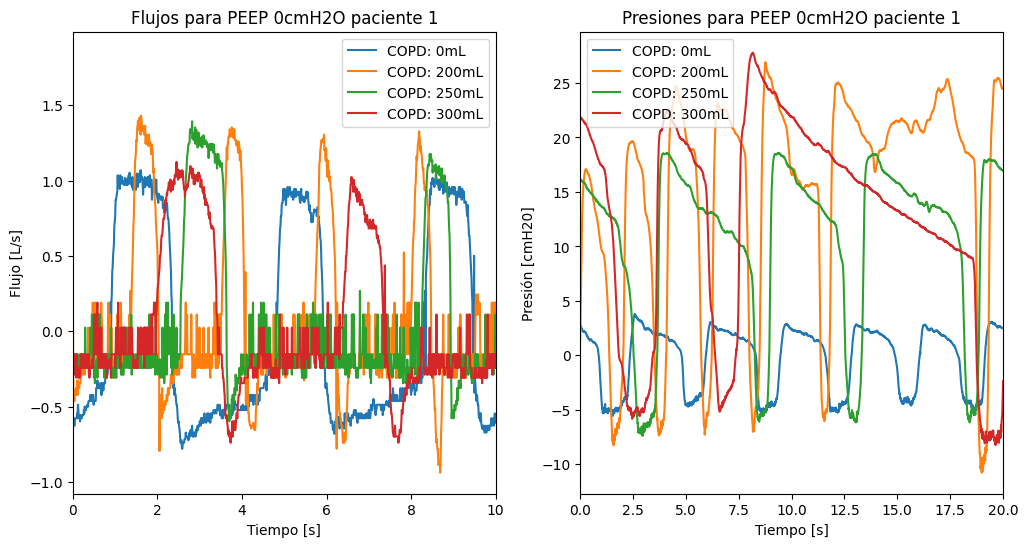

In [29]:
# plotear_flujo_presiones_copd(Paciente,PEEP)
# Paciente: 1-20 
# PEEP: 0, 4, 8
plotear_flujo_presiones_copd(1,0) 

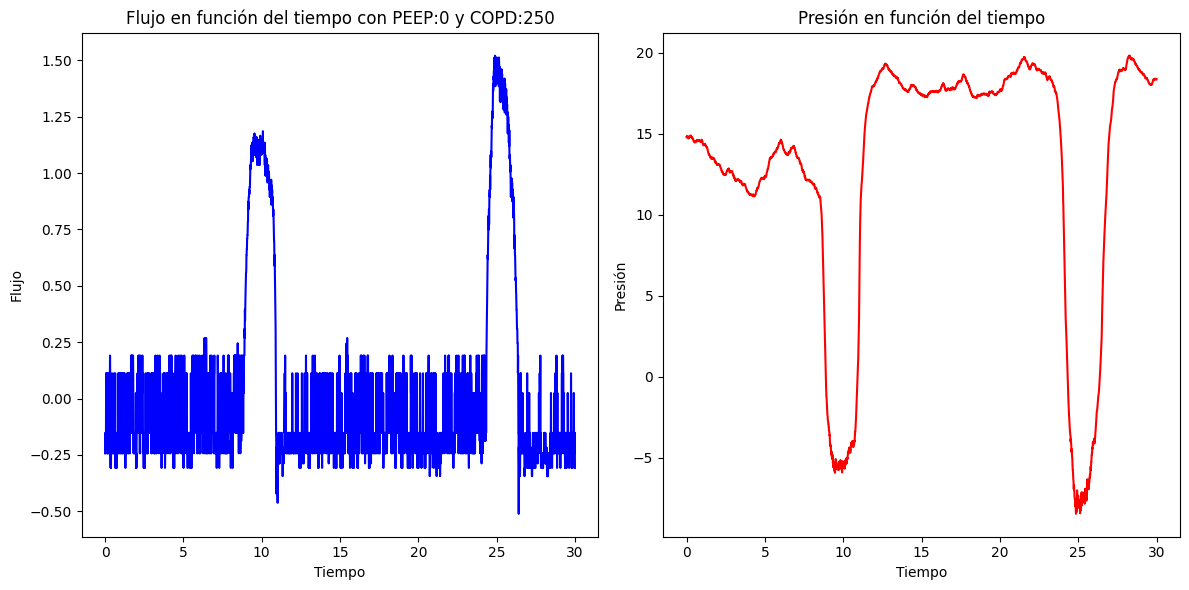

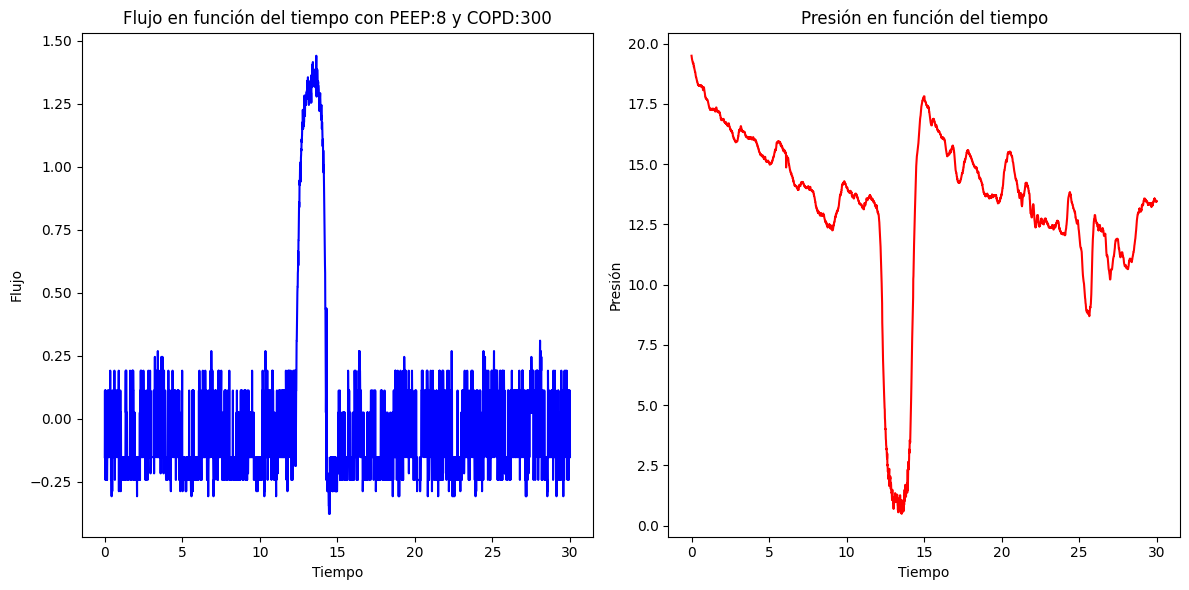

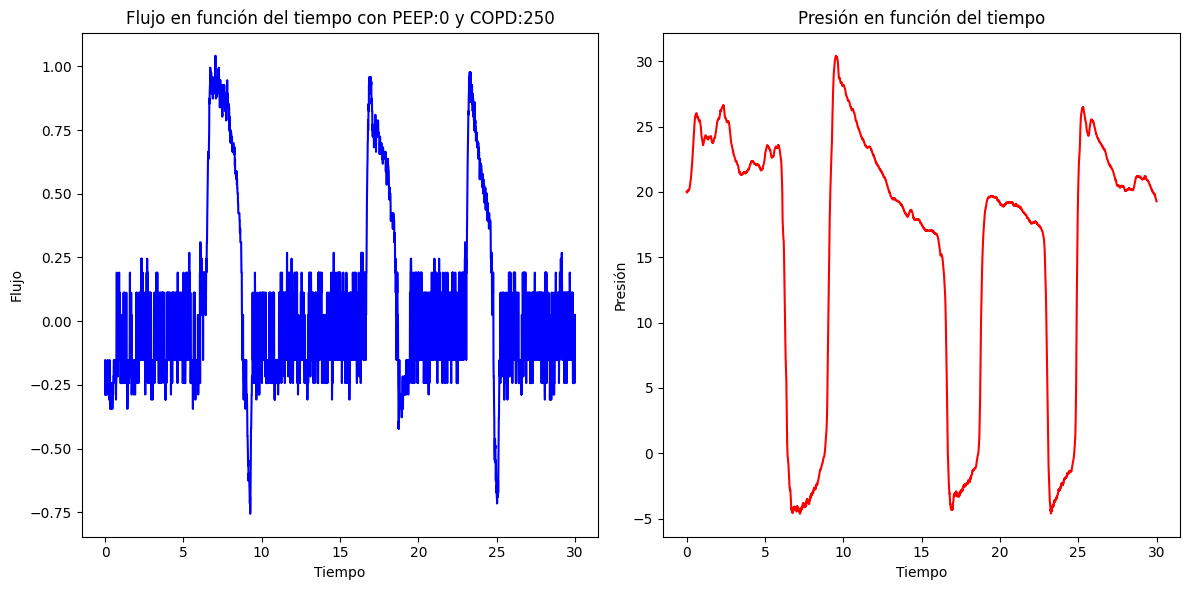

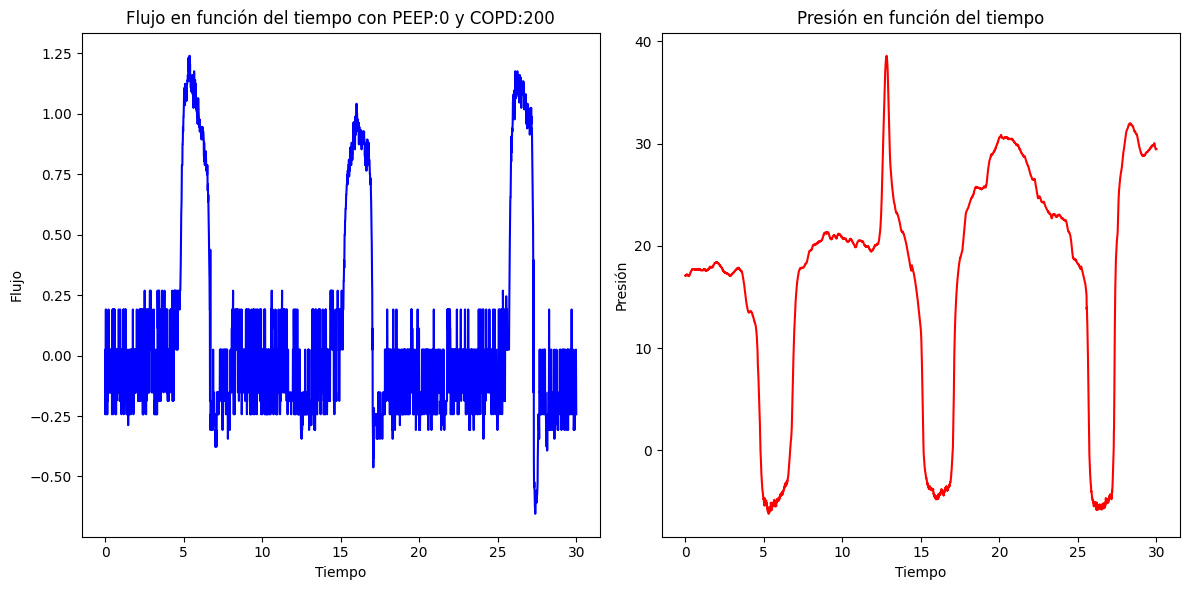

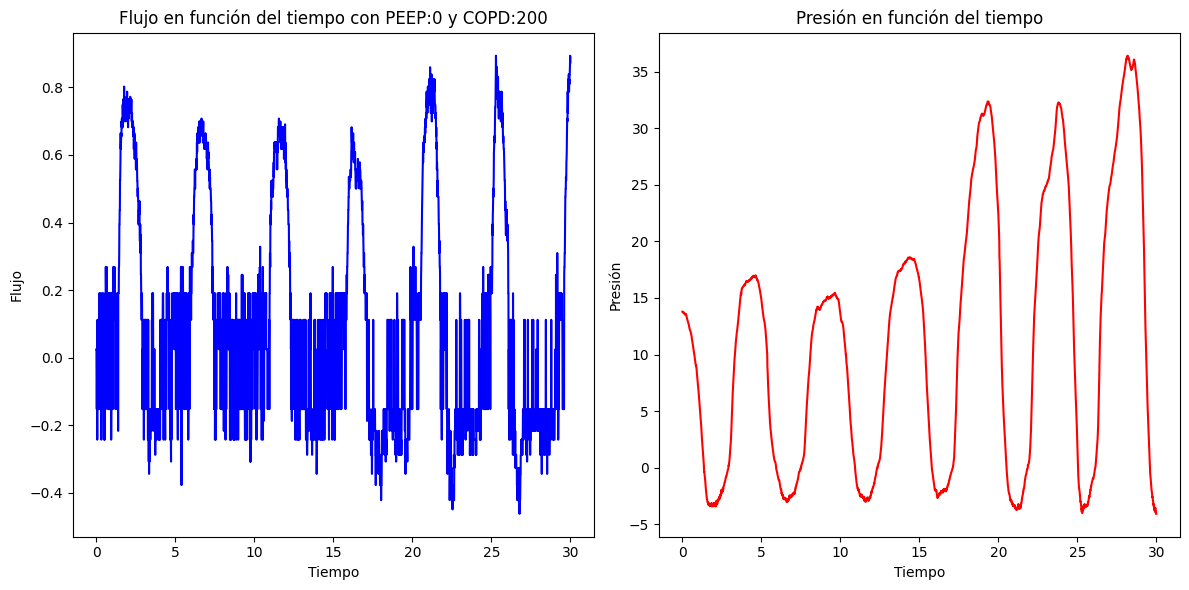

In [30]:
i=1
while i<=5:
    n=random.randint(0, 239)
    plot_flujo_presion(n)
    i+=1
    

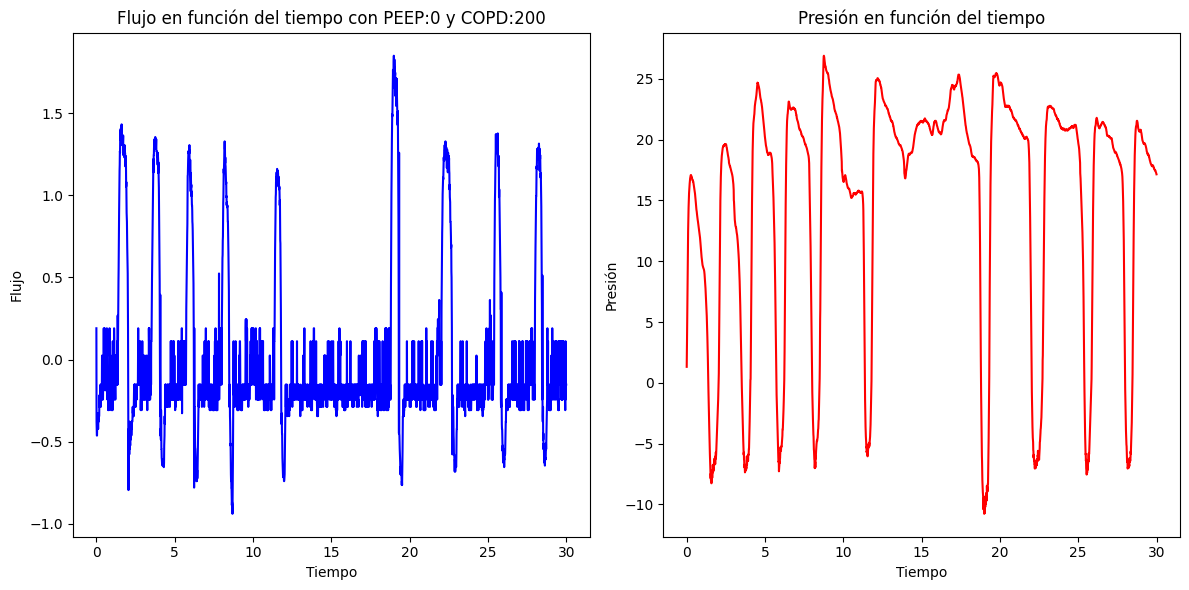

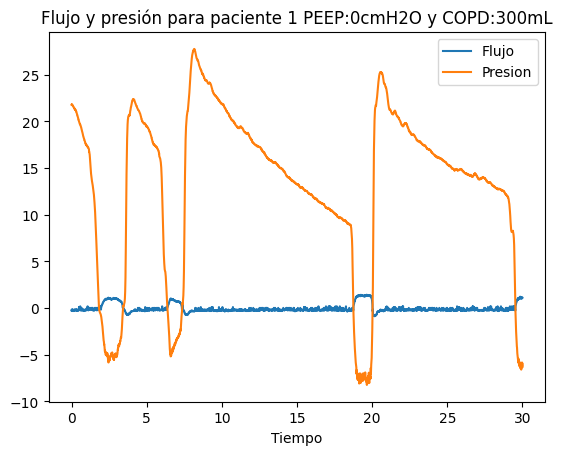

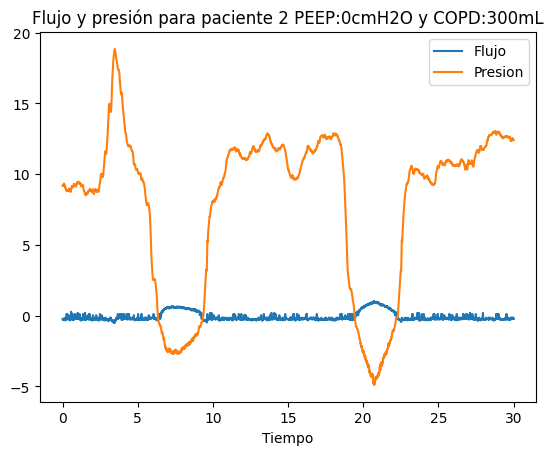

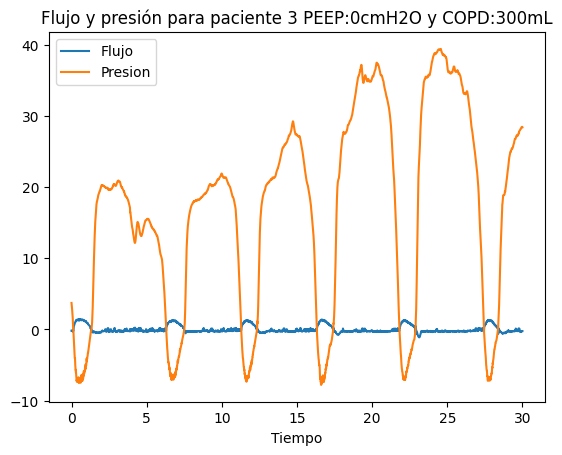

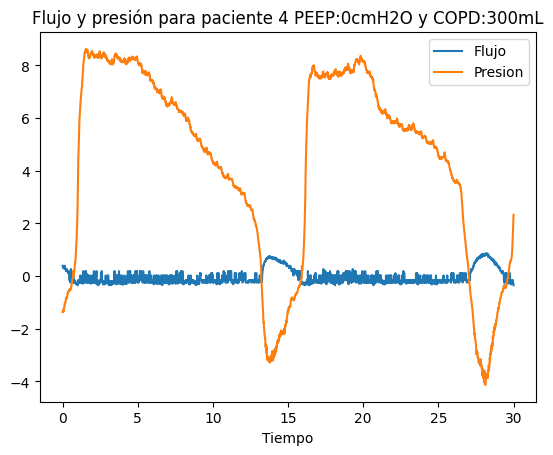

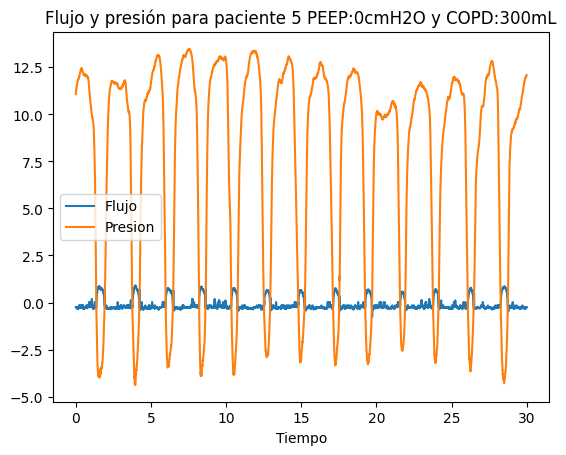

In [38]:
# plotear_flujoypresion(Paciente,PEEP,COPD)
# Paciente: 1-20 
# PEEP: 0, 4, 8
# COPD: 0, 200, 250, 300

i=1
plot_flujo_presion(i)
while i<=5:
    plot_flujoypresion(i,0,300)
    i+=1

PARA PRESION

In [32]:
X=lista_presiones
#X=lista_flujos

# Definimos los valores de EPOC 
y = COPD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Modelo de regresión logística
modeloLR = LogisticRegression()
modeloLR.fit(X_train, y_train)

# Modelo Naive Bayes
modeloNB = GaussianNB()
modeloNB.fit(X_train, y_train)

# Modelo KNN
k = 3
modeloKNN = KNeighborsClassifier(n_neighbors=k)
modeloKNN.fit(X_train, y_train)

# Comprobación de modelos
y_pred_NB = modeloNB.predict(X_test)
y_pred_LR = modeloLR.predict(X_test)
y_pred_KNN = modeloKNN.predict(X_test)

# Resultados
precision_NB = accuracy_score(y_test, y_pred_NB)
precision_LR = accuracy_score(y_test, y_pred_LR)
precision_KNN = accuracy_score(y_test, y_pred_KNN)

print("Precisión del modelo Naive Bayes:", precision_NB)
print("Precisión del modelo Regresión Logística:", precision_LR)
print("Precisión del modelo KNN:", precision_KNN)

Precisión del modelo Naive Bayes: 0.4375
Precisión del modelo Regresión Logística: 0.1875
Precisión del modelo KNN: 0.3958333333333333


c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Métricas para el modelo Naive Bayes
precision_NB = precision_score(y_test, y_pred_NB, average='weighted')
recall_NB = recall_score(y_test, y_pred_NB, average='weighted')
f1_NB = f1_score(y_test, y_pred_NB, average='weighted')
conf_matrix_NB = confusion_matrix(y_test, y_pred_NB)

print("Métricas del modelo Naive Bayes:")
print("Precisión:", precision_NB)
print("Recall:", recall_NB)
print("F1-score:", f1_NB)
print("Matriz de confusión:")
print(conf_matrix_NB)

# Métricas para el modelo de Regresión Logística
precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
f1_LR = f1_score(y_test, y_pred_LR, average='weighted')
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)

print("\nMétricas del modelo de Regresión Logística:")
print("Precisión:", precision_LR)
print("Recall:", recall_LR)
print("F1-score:", f1_LR)
print("Matriz de confusión:")
print(conf_matrix_LR)

# Métricas para el modelo KNN
precision_KNN = precision_score(y_test, y_pred_KNN, average='weighted')
recall_KNN = recall_score(y_test, y_pred_KNN, average='weighted')
f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

print("\nMétricas del modelo KNN:")
print("Precisión:", precision_KNN)
print("Recall:", recall_KNN)
print("F1-score:", f1_KNN)
print("Matriz de confusión:")
print(conf_matrix_KNN)

Métricas del modelo Naive Bayes:
Precisión: 0.4357142857142857
Recall: 0.4375
F1-score: 0.4279411764705882
Matriz de confusión:
[[9 0 0 0]
 [0 2 3 8]
 [0 2 4 6]
 [0 3 5 6]]

Métricas del modelo de Regresión Logística:
Precisión: 0.17875
Recall: 0.1875
F1-score: 0.1601873612743178
Matriz de confusión:
[[ 1  4  3  1]
 [ 2  1  5  5]
 [ 0  3  6  3]
 [ 0  2 11  1]]

Métricas del modelo KNN:
Precisión: 0.35642361111111115
Recall: 0.3958333333333333
F1-score: 0.36171085858585855
Matriz de confusión:
[[9 0 0 0]
 [3 3 2 5]
 [3 1 2 6]
 [0 5 4 5]]


PARA FLUJO

In [35]:
X=lista_flujos

# Definimos los valores de EPOC 
y = COPD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Modelo de regresión logística
modeloLR = LogisticRegression()
modeloLR.fit(X_train, y_train)

# Modelo Naive Bayes
modeloNB = GaussianNB()
modeloNB.fit(X_train, y_train)

# Modelo KNN
k = 3
modeloKNN = KNeighborsClassifier(n_neighbors=k)
modeloKNN.fit(X_train, y_train)

# Comprobación de modelos
y_pred_NB = modeloNB.predict(X_test)
y_pred_LR = modeloLR.predict(X_test)
y_pred_KNN = modeloKNN.predict(X_test)

# Resultados
precision_NB = accuracy_score(y_test, y_pred_NB)
precision_LR = accuracy_score(y_test, y_pred_LR)
precision_KNN = accuracy_score(y_test, y_pred_KNN)

print("Precisión del modelo Naive Bayes:", precision_NB)
print("Precisión del modelo Regresión Logística:", precision_LR)
print("Precisión del modelo KNN:", precision_KNN)

Precisión del modelo Naive Bayes: 0.4375
Precisión del modelo Regresión Logística: 0.3125
Precisión del modelo KNN: 0.3958333333333333


c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Métricas para el modelo Naive Bayes
precision_NB = precision_score(y_test, y_pred_NB, average='weighted')
recall_NB = recall_score(y_test, y_pred_NB, average='weighted')
f1_NB = f1_score(y_test, y_pred_NB, average='weighted')
conf_matrix_NB = confusion_matrix(y_test, y_pred_NB)

print("Métricas del modelo Naive Bayes:")
print("Precisión:", precision_NB)
print("Recall:", recall_NB)
print("F1-score:", f1_NB)
print("Matriz de confusión:")
print(conf_matrix_NB)

# Métricas para el modelo de Regresión Logística
precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
f1_LR = f1_score(y_test, y_pred_LR, average='weighted')
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)

print("\nMétricas del modelo de Regresión Logística:")
print("Precisión:", precision_LR)
print("Recall:", recall_LR)
print("F1-score:", f1_LR)
print("Matriz de confusión:")
print(conf_matrix_LR)

# Métricas para el modelo KNN
precision_KNN = precision_score(y_test, y_pred_KNN, average='weighted')
recall_KNN = recall_score(y_test, y_pred_KNN, average='weighted')
f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

print("\nMétricas del modelo KNN:")
print("Precisión:", precision_KNN)
print("Recall:", recall_KNN)
print("F1-score:", f1_KNN)
print("Matriz de confusión:")
print(conf_matrix_KNN)

Métricas del modelo Naive Bayes:
Precisión: 0.49264537545787546
Recall: 0.4375
F1-score: 0.43899621212121215
Matriz de confusión:
[[9 0 1 1]
 [1 3 3 1]
 [2 5 4 1]
 [1 6 5 5]]

Métricas del modelo de Regresión Logística:
Precisión: 0.3070075757575757
Recall: 0.3125
F1-score: 0.30340608465608465
Matriz de confusión:
[[4 3 2 2]
 [1 2 2 3]
 [2 1 6 3]
 [4 4 6 3]]

Métricas del modelo KNN:
Precisión: 0.42295751633986933
Recall: 0.3958333333333333
F1-score: 0.3831239142333595
Matriz de confusión:
[[8 2 0 1]
 [1 3 3 1]
 [0 4 6 2]
 [1 6 8 2]]
